# 6. Animal, Vegetable or Machine Learning

## Datasets
  * [V&A](https://collections.vam.ac.uk/)
  * [BBC Archive](https://www.bbc.co.uk/archive/)
  * [CIFAR100 Training Data](https://www.cs.toronto.edu/~kriz/cifar.html) - See [Exposing AI](https://exposing.ai/) project for the ethics around image training sets.

## Libraries

  * [Pandas](https://pandas.pydata.org/)
  * [Tensorflow](https://www.tensorflow.org/)
  * [Keras](https://keras.io/)
  * [AutoKeras](https://autokeras.com/)

Animal, Vegetable or Mineral is a basic form of classification that has a [long history](https://www.linnean.org/), and inevitably in the UK, a panel show, that has featured the  V&A collections, as can be seen in this [recording](https://www.bbc.co.uk/iplayer/episode/p017ggk3/animal-vegetable-mineral-011019) from the BBC television show of the same name from 1958. In that show the panellists were challenged to identify the following objects:

  * [Swedish Padlock](https://collections.vam.ac.uk/item/O380127/padlock-unknown/)
  * Peruvian Doll
  * [Hanukkah Lamp](https://collections.vam.ac.uk/item/O72424/hanukkah-lamp-unknown/)
  * [Watch](https://collections.vam.ac.uk/item/O114502/watch-jean-pattru/)
  * Acupuncture Doll (from the [Royal College of Surgeons Collection](https://www.rcseng.ac.uk/museums-and-archives/hunterian-museum/about-us/collections/)
  * Axe Sheath
  * [Spoon](https://collections.vam.ac.uk/item/O109114/spoon-unknown/)
  * [Candle Mould](https://collections.vam.ac.uk/item/O120039/candle-mould/)
  
Let's see if some (very simple) machine (learning) can do better than the humans on the objects featured in the show.

## Image Classification

First we need to build the model, using a training dataset from [CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html). This has 10 broad classifications and 100 more detailed ones within those.

```{note}
This step will take some time, and ideally should be run for a *much* longer time than carried out here to get better results. This exmaple is not a real indication of the quality of human or machine learning. For a real introduction to machine learning, see the million guides on the internet for this (perhaps start with the [Keras](https://keras.io/) website.
```

In [150]:
from keras.datasets import cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode="fine")

In [151]:
import autokeras as ak

amv_classifier = ak.ImageClassifier(max_trials=2)
amv_classifier.fit(X_train, y_train, epochs=5)

INFO:tensorflow:Reloading Oracle from existing project ./image_classifier/oracle.json
INFO:tensorflow:Reloading Tuner from ./image_classifier/tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/5
1563/1563 [==============================] - 66s 42ms/step - loss: 3.8205 - accuracy: 0.1388
Epoch 2/5
1563/1563 [==============================] - 64s 41ms/step - loss: 2.7901 - accuracy: 0.3161
Epoch 3/5
1563/1563 [==============================] - 67s 43ms/step - loss: 2.4320 - accuracy: 0.3895
Epoch 4/5
1563/1563 [==============================] - 63s 40ms/step - loss: 2.1853 - accuracy: 0.4420
Epoch 5/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.9980 - accuracy: 0.4805
INFO:tensorflow:Assets written to: ./image_classifier/best_model/assets


The classifications in the CIFAR100 training set are as follows:

In [163]:
cifar100_broad_classes = [
"beaver", "dolphin", "otter", "seal", "whale", 
"aquarium fish", "flatfish", "ray", "shark", "trout", 
"orchids", "poppies", "roses", "sunflowers", "tulips", 
"bottles", "bowls", "cans", "cups", "plates", 
"apples", "mushrooms", "oranges", "pears", "sweet peppers", 
"clock", "computer keyboard", "lamp", "telephone", "television", 
"bed", "chair", "couch", "table", "wardrobe", 
"bee", "beetle", "butterfly", "caterpillar", "cockroach", 
"bear", "leopard", "lion", "tiger", "wolf", 
"bridge", "castle", "house", "road", "skyscraper", 
"cloud", "forest", "mountain", "plain", "sea", 
"camel", "cattle", "chimpanzee", "elephant", "kangaroo", 
"fox", "porcupine", "possum", "raccoon", "skunk", 
"crab", "lobster", "snail", "spider", "worm", 
"baby", "boy", "girl", "man", "woman", 
"crocodile", "dinosaur", "lizard", "snake", "turtle", 
"hamster", "mouse", "rabbit", "shrew", "squirrel", 
"maple", "oak", "palm", "pine", "willow", 
"bicycle", "bus", "motorcycle", "pickup truck", "train", 
"lawn-mower", "rocket", "streetcar", "tank", "tractor"]

So, it looks the only one we can try is the 'Hanukkah lamp'. This is another indication that this is not a very suitable test of machine learning in this example, and a training set more designed for cultural heritage object classification would perform much better (perhaps someone is working on this training set somewhere). Anyway, let's see what we get from it. First we need to convert our object image into the right matrix size to match the neural network inputs.

In [157]:
import requests
from PIL import Image

req = requests.get("https://api.vam.ac.uk/v2/object/O72424")
lamp = req.json()
lamp_thumbnail_url = lamp['meta']['images']['_primary_thumbnail']
response = requests.get(lamp_thumbnail_url, stream=True)
img_array = None
img = Image.open(response.raw)
img = img.convert('RGB')
img = img.resize((32,32), Image.NEAREST)
img_array = image.img_to_array(img)

## Prediction

Now we have the image to test, we can feed it into the classifier trained on the training data.

In [164]:
import numpy as np

predictions = amv_classifier.predict(np.array([img_array]))
print(f"Object has class {cifar100_broad_classes[int(predictions[0][0])]}")

Object has class television


In [166]:
print(f"Object has class {cifar100_broad_classes[int(predictions[0][0])]}")

Object has class television


Hmmm, well, not quite, but at least it's broadly in the right area ('household electrical items'). Let's take a look at what the algorithm was seeing:

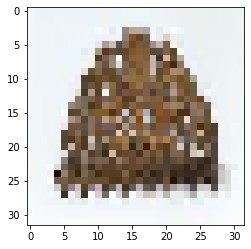

In [167]:
imgplot = plt.imshow(array_to_img(img_array))
plt.show()


Of course, the training set's idea of a lamp is something rather different than this, so a television isn't such an unusual guess. It's likely more model training would not really affect the predicitions, as the key issue here is the training data not really being applicable to rare cultural heritage objects (a huge clue to that being in the broad group name of 'household electrical items' for a C16th lamp). But with enough examples of objects from multiple collections in a cultural heritage training dataset, there could be some improvements in the predictions for some of the items on the Animal, Vegatable or Mineral dataset. 

## Victory for Humans

For now...